### Preliminaries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pyaudio
import wave

In [21]:
CHUNK = 1024
RATE = 44100
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RECORD_SECONDS = 5

### Recording

In [22]:
p = pyaudio.PyAudio()

frames = []
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=CHUNK
)

try:
    print('Recording...')
    for i in range(0, RATE // CHUNK * RECORD_SECONDS):
        data = stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.float32)
        frames.extend(audio_data)
    
finally:
    print("Done")
    stream.stop_stream()
    stream.close()
    p.terminate()

ALSA lib pcm_dsnoop.c:601:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1032:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib pcm_dmix.c:1032:(snd_pcm_dmix_open) unable to open slave


Recording...
Done


### Signal in Time Domain

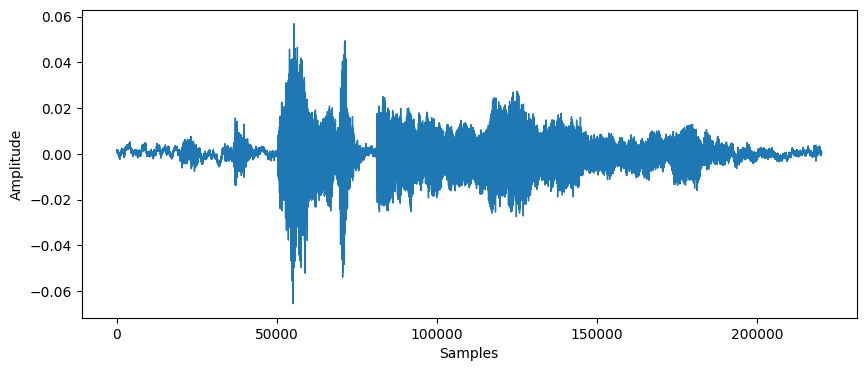

In [23]:
audio_signal = np.array(frames)

plt.figure(figsize=(10, 4))
sns.lineplot(data=audio_signal, lw=1)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

### Save to file

In [25]:
with wave.open("../data/derived/example.wav", "wb") as wf:
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b"".join(frames))